In [1]:
Name = "Kerwyn Jean"
Class = "Info & Data Management CISC 2500"
Assignment = "Python Final Project"
csv_files_used = ["Air Quality @ NYC Open Source Database", "Air Temperature from 1994 - 2024 @ NOAA National Centers For Environmental Information (NCEI) - climate data online"]

# This will be my Python Final Project, where I analyze CSV files
# These CSV files will be on air quality within New York City from 2005 to 2023
# Another CSV file will focus on weather within New York City, holding information from 1994 to 2024

In [2]:
# importing the necessary libraries to start data analysis
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# in jupypter notebooks, set the project root to the current working directory
# similar aspect to Path(__file__) in regular python scripts
PROJECT_ROOT = Path.cwd()

# creates paths to the csv files in folders
CSV_FILE_AIR_QUALITY = PROJECT_ROOT / "air_quality.csv"
CSV_FILE_WEATHER_DIR = PROJECT_ROOT # since weather csv files will be formatted a certain way, setting up a base connection to directory is needed

# list all weather csv files using glob and sorts them based on years
weather_files = sorted(CSV_FILE_WEATHER_DIR.glob("monthly_from_*.csv"))

# loading air quality csv into a dataframe
air_df = pd.read_csv(CSV_FILE_AIR_QUALITY)

# loads and combines all weather csv files into a single dataframe
weather_dfs = [pd.read_csv(p) for p in weather_files]
weather_df = pd.concat(weather_dfs, ignore_index=True)

# The 5 questions I want to answer:
1) How has NYC's Air Quality Evolved from 2005 to 2023? Specifically, are there any long-term upward/downward trends across the measured air-quality indicators?
2) Which seasons consistently exhibit higher or lower pollution levels?
3) Is there a consistent, correlational explanation for the Monthly Average Temperature and Air Quality?
4) Do extreme temperature months (hot/cold) show different air quality values compared to more average temperature months?
5) Do asthma emergency department visits associated with PM2.5 and ozone differ during cold, average, and hot temperature months?

### QUESTION 1: How has NYC's Air Quality Evolved from 2005 to 2023? Specifically, are there any long-term upward/downward trends across the measured air-quality indicators?

In [4]:
# Implementation for QUESTION 1
# information of the dataframe
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18862 non-null  int64  
 1   Indicator ID    18862 non-null  int64  
 2   Name            18862 non-null  object 
 3   Measure         18862 non-null  object 
 4   Measure Info    18862 non-null  object 
 5   Geo Type Name   18862 non-null  object 
 6   Geo Join ID     18862 non-null  int64  
 7   Geo Place Name  18862 non-null  object 
 8   Time Period     18862 non-null  object 
 9   Start_Date      18862 non-null  object 
 10  Data Value      18862 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [5]:
# For future aggregations, I will turn the Start_Date column into a datetime value to take out the year
# Once we take out the year, we can create a new column using .dt.year
# now the air quality dataframe has a year column
air_df["Start_Date"] = pd.to_datetime(air_df["Start_Date"], errors="coerce")
air_df = air_df.dropna(subset=["Start_Date"])
air_df["year"] = air_df["Start_Date"].dt.year

# sanity checking columns "Start_Date" and "year"
air_df[["Start_Date", "year"]].head()

,Start_Date,year
0,2023-06-01,2023
1,2023-06-01,2023
2,2023-06-01,2023
3,2023-06-01,2023
4,2023-06-01,2023


In [6]:
# computes the annual air quality based on the indicator
# I want to focus on pollutants, so I will only use PM 2.5, NO2, and O3 for simplicity sake
air_yearly = (
    air_df
    .groupby(["year", "Name"])["Data Value"]
    .mean()
    .reset_index()
    .rename(columns={"Data Value": "avg_data_val"})
)

air_yearly["Name"].unique()

array(['Annual vehicle miles traveled',
       'Annual vehicle miles traveled (cars)',
       'Annual vehicle miles traveled (trucks)',
       'Asthma emergency department visits due to PM2.5',
       'Asthma emergency departments visits due to Ozone',
       'Asthma hospitalizations due to Ozone',
       'Cardiac and respiratory deaths due to Ozone',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Deaths due to PM2.5', 'Outdoor Air Toxics - Benzene',
       'Outdoor Air Toxics - Formaldehyde',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)',
       'Boiler Emissions- Total NOx Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total SO2 Emissions'], dtype=object)

In [7]:
# list of the pollutants I will use
pollutants = [
    "Fine particles (PM 2.5)",
    "Nitrogen dioxide (NO2)",
    "Ozone (O3)",
]

# creates a new dataframe that extracts ONLY the indicators that are pollutants
air_pollutants_yearly = air_yearly[air_yearly["Name"].isin(pollutants)].copy()

air_pollutants_yearly.head(1)

,year,Name,avg_data_val
12,2008,Fine particles (PM 2.5),12.267518


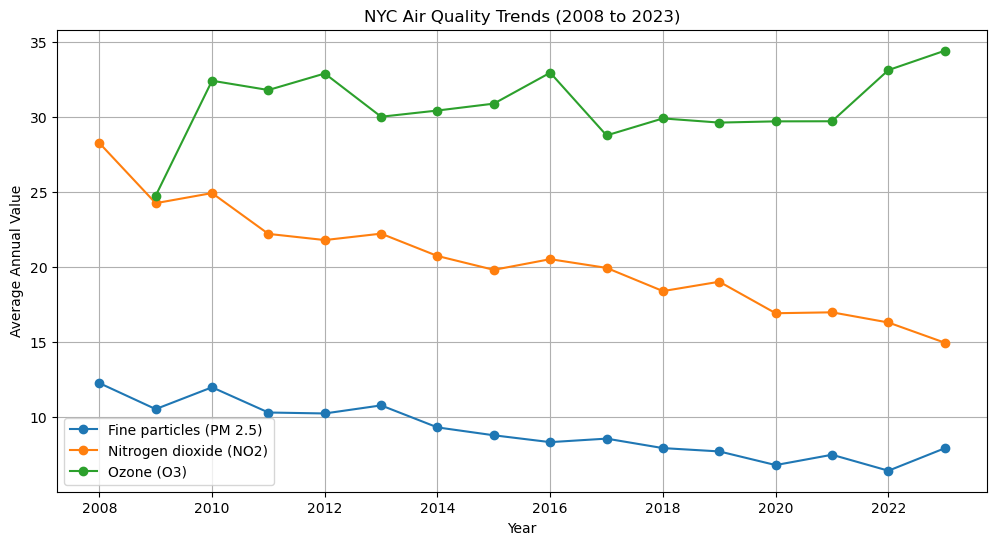

In [8]:
# To help visualize the question, I created a graph to display key findings
plt.figure(figsize=(12,6))

# using unique to make sure only distinct pollutant names will be shown in legend
for pollutant in air_pollutants_yearly["Name"].unique():
    # additionally, we need to make sure that for each unique pollutant, we are making a distinct line
    # hence the need to check if the name in the dataframe equals the current pollutant
    polls = air_pollutants_yearly[air_pollutants_yearly["Name"] == pollutant]
    plt.plot( # from there we use the columns in the dataframe to plot
        polls["year"], 
        polls["avg_data_val"],
        marker="o",
        label=pollutant
    )

# makes a title
# x and y axis
# the legend to showcase which colored line is which indicator
# and showing a grid for better visuals
plt.title("NYC Air Quality Trends (2008 to 2023)")
plt.xlabel("Year")
plt.ylabel("Average Annual Value")
plt.legend()
plt.grid(True)
plt.show()

# ANSWERING QUESTION 1:
- For Fine Particles (PM 2.5), this indicator refers to "fine inhalable particles, with diameters that are generally 2.5 micrometers and smaller" (EPA, 2025). PM 2.5 data clearly show a long-term downward trend from 2008 to 2023, indicating an improvement in particulate air quality. The year-to-year fluctuations are apparent, for instance, when it rises in 2010, declines, and then steadily increases in 2023. However, overall, the levels in the 2020s remain substantially lower than those in the late 2000s.

- For Nitrogen Dioxide (NO2), it exhibited the strongest and most consistent decline across the entire period. This pattern aligns with sources that report significant NO2 reductions during the COVID-19 period, specifically where satellite-based analyses reported notable decreases around NYC in early 2020, followed by a partial recovery later in 2020 as societal activity resumed (Goldberg et al., 2020; Kwong, 2022). In the annual averages of this dataset, the sustained downward trend suggests long-term reductions that extend beyond any single year.

- Finally, for Ozone (O3), it does not show a clear downward trend; instead, it clearly fluctuates every year. From 2009 to 2010, we can identify a spike in the indicator's quantity, followed by stagnation, a drop during the 2016-17 period, stagnation once again, and then a new peak from 2021 to 2023. The peak in 2023 can be explained through the overall high levels of ozone within New York metropolitan areas, especially during the summertime, where O3 continues to get "impacted by local circulations spatially" (Luo, 2024). Prior work also indicates that ozone levels in the NYC region can be significantly influenced by seasonal conditions and local atmospheric circulation patterns, specifically during the summer (Luo, 2024). The dataset supports the interpretation that O3 behaves differently compared to other indicators, such as PM 2.5 and NO2, and may also illustrate how O3 does not respond in the same direct way to emissions reductions.

### CONCLUSION: Overall, it appears that NYC air quality has improved significantly from 2008 to 2023, particularly for PM2.5 and NO2, while Ozone levels seem to remain variable and have not shown any long-term decline. These results demonstrate that air quality improvements are more pollutant-specific, rather than a consistent impact across indicators.

### QUESTION 2: Which seasons consistently exhibit higher or lower pollution levels?

In [9]:
# Implementation for QUESTION 2
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unique ID       18862 non-null  int64         
 1   Indicator ID    18862 non-null  int64         
 2   Name            18862 non-null  object        
 3   Measure         18862 non-null  object        
 4   Measure Info    18862 non-null  object        
 5   Geo Type Name   18862 non-null  object        
 6   Geo Join ID     18862 non-null  int64         
 7   Geo Place Name  18862 non-null  object        
 8   Time Period     18862 non-null  object        
 9   Start_Date      18862 non-null  datetime64[ns]
 10  Data Value      18862 non-null  float64       
 11  Message         0 non-null      float64       
 12  year            18862 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(6)
memory usage: 1.8+ MB


In [10]:
# to answer this question, instead of year, we can extract the value "month" from the datetime column: Start_Date
air_df["month"] = air_df["Start_Date"].dt.month

"""
The air quality CSV is formatted weirdly
It is broken up seasonally, so in order to map the air quality to months
We will make sure that we manually define the seasons based on the months
"""
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# after defining the seasons, we can just map the function to the month column
# based on whatever that month is, the season column will be based on that number
air_df["season"] = air_df["month"].map(assign_season)
air_df.head(2)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,year,month,season
0,878218,386,Ozone (O3),Mean,ppb,UHF42,402,West Queens,Summer 2023,2023-06-01,34.365989,NaN,2023,6,Summer
1,876975,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,501,Port Richmond,Summer 2023,2023-06-01,11.331992,NaN,2023,6,Summer


In [11]:
# for this question, I will be reusing the same pollutants from the other question
pollutants = [
    "Fine particles (PM 2.5)",
    "Nitrogen dioxide (NO2)",
    "Ozone (O3)",
]

# then creating a dataframe that makes sure that only rows of information are used 
# only when the indicator is a pollutant
air_pollutants = air_df[air_df["Name"].isin(pollutants)].copy()
air_pollutants

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,year,month,season
0,878218,386,Ozone (O3),Mean,ppb,UHF42,402,West Queens,Summer 2023,2023-06-01,34.365989,NaN,2023,6,Summer
1,876975,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,501,Port Richmond,Summer 2023,2023-06-01,11.331992,NaN,2023,6,Summer
2,876900,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,207,East Flatbush - Flatbush,Summer 2023,2023-06-01,12.020333,NaN,2023,6,Summer
3,877140,375,Nitrogen dioxide (NO2),Mean,ppb,CD,205,Fordham and University Heights (CD5),Summer 2023,2023-06-01,14.123178,NaN,2023,6,Summer
4,874556,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,410,Rockaways,Summer 2023,2023-06-01,8.150637,NaN,2023,6,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,171559,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,101,Kingsbridge - Riverdale,Winter 2008-09,2008-12-01,28.210000,NaN,2008,12,Winter
17961,168404,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,111,East Harlem (CD11),Winter 2008-09,2008-12-01,14.150000,NaN,2008,12,Winter
17962,178421,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,305,Upper East Side,Annual Average 2009,2008-12-01,12.880000,NaN,2008,12,Winter
17963,167523,375,Nitrogen dioxide (NO2),Mean,ppb,CD,203,Morrisania and Crotona (CD3),Annual Average 2009,2008-12-01,27.710000,NaN,2008,12,Winter


In [12]:
# similar to the previous question, we will be computing averages of pollution by months and by the seasons
# very similar implementation where we group by the name, month, and data values
monthly_avg = (
    air_pollutants
    .groupby(["Name", "month", "year"])["Data Value"]
    .mean()
    .reset_index()
    .rename(columns={"Data Value": "avg_monthly_val"})
)

# for clarity, in this CSV, once again, it only displays January, June, and December averages
monthly_avg

,Name,month,year,avg_monthly_val
0,Fine particles (PM 2.5),1,2015,9.038726
1,Fine particles (PM 2.5),1,2017,7.737801
2,Fine particles (PM 2.5),1,2018,7.384326
3,Fine particles (PM 2.5),1,2019,7.012553
4,Fine particles (PM 2.5),1,2020,6.321702
...,...,...,...,...
86,Ozone (O3),6,2019,29.646312
87,Ozone (O3),6,2020,29.728794
88,Ozone (O3),6,2021,29.735170
89,Ozone (O3),6,2022,33.149042


In [13]:
# hence why for the seasonal averages, there are only two unique values in the season column
seasonal_avg = (
    air_pollutants
    .groupby(["Name", "season", "year"])["Data Value"]
    .mean()
    .reset_index()
    .rename(columns={"Data Value": "avg_seasonal_val"})
)

# clear data limitation within the CSV
seasonal_avg

,Name,season,year,avg_seasonal_val
0,Fine particles (PM 2.5),Summer,2009,11.103191
1,Fine particles (PM 2.5),Summer,2010,12.206099
2,Fine particles (PM 2.5),Summer,2011,11.785177
3,Fine particles (PM 2.5),Summer,2012,10.660000
4,Fine particles (PM 2.5),Summer,2013,10.559433
...,...,...,...,...
72,Ozone (O3),Summer,2019,29.646312
73,Ozone (O3),Summer,2020,29.728794
74,Ozone (O3),Summer,2021,29.735170
75,Ozone (O3),Summer,2022,33.149042


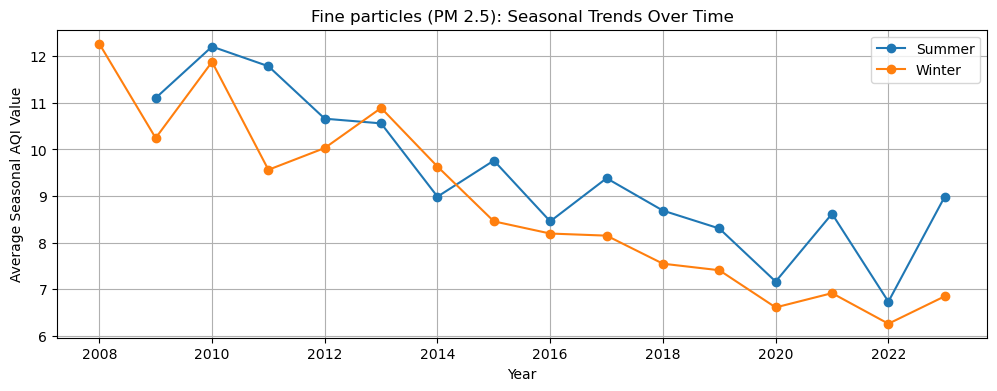

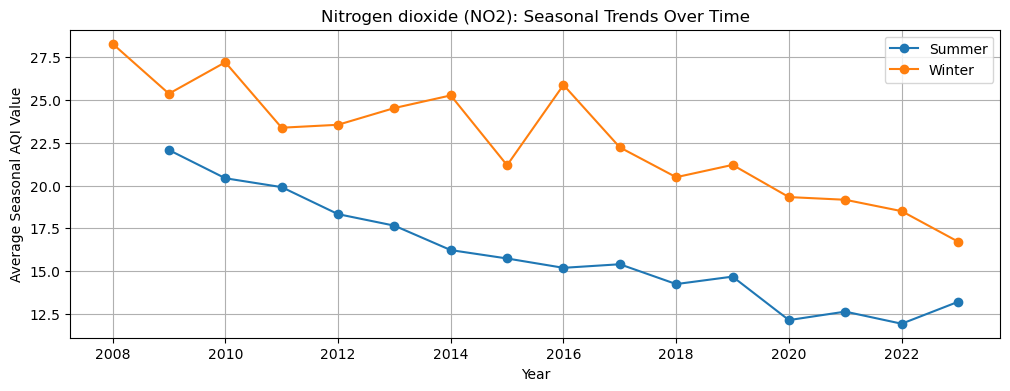

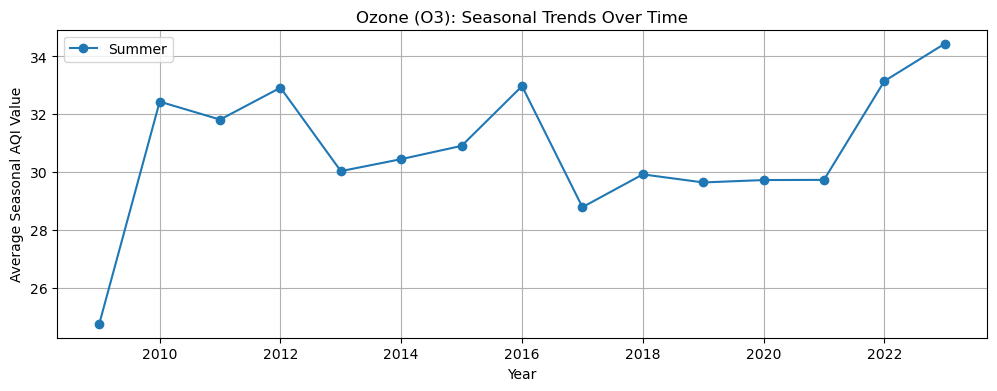

In [14]:
# creating visuals for each of the pollutants to display 
# similar concept to question one, but instead of incorporating all seasonal values
# we separate the indicators even further to display summer and winter
for pollutant in seasonal_avg["Name"].unique():
    subset = seasonal_avg[seasonal_avg["Name"] == pollutant] # for loop to iterate through each pollutant indicator 

    plt.figure(figsize=(12,4))

    for season in subset["season"].unique():
        season_data = subset[subset["season"] == season]
        plt.plot(
            season_data["year"],
            season_data["avg_seasonal_val"],
            marker="o",
            label=season
        )

    plt.title(f"{pollutant}: Seasonal Trends Over Time") # for each pollutant
    plt.xlabel("Year")
    plt.ylabel("Average Seasonal AQI Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# ANSWERING QUESTION 2:
- Based on the available seasonal averages, there were pretty clear differences between the summer and winter air pollution levels in NYC. For PM 2.5, the averages were slightly higher in the summer compared to winter, possibly indicating that particulate pollution increases during warmer months.

- For NO2, its average value is much higher in the winter compared to the summer. This pattern is consistent with external sources speaking about how NO2 concentrations are usually higher in colder seasons due to "reduced atmospheric mixing and weaker winds," allowing pollutants to increase; stronger sunlight and the increase of photolysis rates (how light breaks down a chemical) can lead to a decrease in NO2 levels overall (Bai, 2025).

- For Ozone (O3), it exhibits higher concentrations in the summer with no recorded winter values in this dataset. Ozone's value aligns with already established knowledge on how O3 is usually driven by sunlight and higher temperatures overall (Luo, 2024).

### CONCLUSION: Overall, the winter months tend to have higher NO2 levels, while the summer months exhibit higher PM2.5 and O3 levels. This question supports the claim that seasonal patterns in NYC pollution are pollutant-specific, coming to a similar conclusion as the previous question. In this analysis, specifically, there were limitations with the available information, as the dataset was limited to summer and winter periods and could not provide monthly information for all seasons.

### QUESTION 3: Is there a relational explanation for the Monthly Average Temperature and Air Quality within Central Park?

In [15]:
weather_df

,STATION,NAME,DATE,CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1994-01,0.0,-2.0,55.0,2922.0,25.5,33.2,17.9
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1994-02,0.0,7.0,62.0,3886.0,30.6,37.9,23.2
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1994-03,0.0,21.0,71.0,4641.0,40.7,48.0,33.3
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1994-04,6.0,34.0,84.0,4928.0,55.6,65.2,46.0
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1994-05,54.0,44.0,91.0,5077.0,61.8,72.4,51.2
...,...,...,...,...,...,...,...,...,...,...
19336,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19337,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19338,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19339,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# need to convert the column 'DATE' to monthly datetime 
weather_df["DATE"] = pd.to_datetime(weather_df["DATE"], format="%Y-%m", errors="coerce")

# any rows that have null values are not needed; necessary step in standardizing data to answer the question
weather_df = weather_df.dropna(subset=["DATE"])

# convert the temperature average (TAVG) to a numeric value
weather_df["TAVG"] = pd.to_numeric(weather_df["TAVG"], errors="coerce")
weather_df = weather_df.dropna(subset=["TAVG"])

# since there's a lot of information, I will be centering this dataframe's information to Central Park
# once again, it's good practice to use .copy()
# if not used, we could be making a variable that basically views into the filtered, original weather_df
weather_nyc = weather_df[weather_df["NAME"] == "NY CITY CENTRAL PARK, NY US"].copy()

# extracting year and month using dt.year & dt.month
weather_nyc["year"] = weather_nyc["DATE"].dt.year
weather_nyc["month"] = weather_nyc["DATE"].dt.month

# monthly average temperature (already in monthly averaging in original TAVG column, but averaging is still safe)
monthly_temp = (
    weather_nyc
    .groupby(["year", "month"])["TAVG"]
    .mean()
    .reset_index()
    .rename(columns={"TAVG": "avg_temp"})
)

monthly_temp.head()

,year,month,avg_temp
0,1994,1,25.5
1,1994,2,30.6
2,1994,3,40.7
3,1994,4,55.6
4,1994,5,61.8


In [17]:
# we already made a pollutant dataframe, so it's safe to reuse it with this new question
# comparing monthly temperature to the air quality
air_monthly = (
    air_pollutants
    .groupby(["year", "month", "Name"])["Data Value"]
    .mean()
    .reset_index()
    .rename(columns={"Data Value": "avg_air_val"})
)

air_monthly.head()

,year,month,Name,avg_air_val
0,2008,12,Fine particles (PM 2.5),12.267518
1,2008,12,Nitrogen dioxide (NO2),28.287092
2,2009,6,Fine particles (PM 2.5),11.103191
3,2009,6,Nitrogen dioxide (NO2),22.075248
4,2009,6,Ozone (O3),24.762979


In [18]:
# merging the monthly air quality dataframes
# with the dataframe containing monthly temperatures
# using the merge method
air_temp_merged = air_monthly.merge(
    monthly_temp,
    on=["year", "month"], # both dataframes have year & month from their extracted times so these are the best columns to merge on
    how="inner" # not wanting any null values
)

air_temp_merged

,year,month,Name,avg_air_val,avg_temp
0,2008,12,Fine particles (PM 2.5),12.267518,38.1
1,2008,12,Nitrogen dioxide (NO2),28.287092,38.1
2,2009,6,Fine particles (PM 2.5),11.103191,67.5
3,2009,6,Nitrogen dioxide (NO2),22.075248,67.5
4,2009,6,Ozone (O3),24.762979,67.5
...,...,...,...,...,...
86,2023,1,Fine particles (PM 2.5),6.851945,43.5
87,2023,1,Nitrogen dioxide (NO2),16.722663,43.5
88,2023,6,Fine particles (PM 2.5),8.988542,70.0
89,2023,6,Nitrogen dioxide (NO2),13.202019,70.0


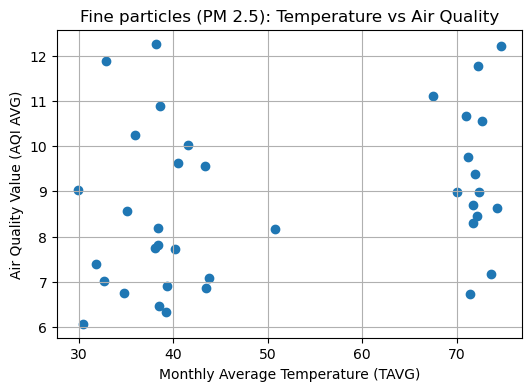

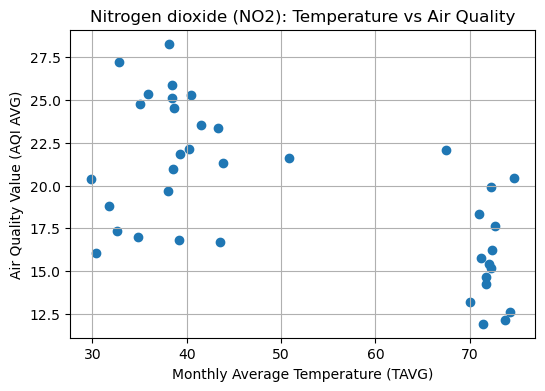

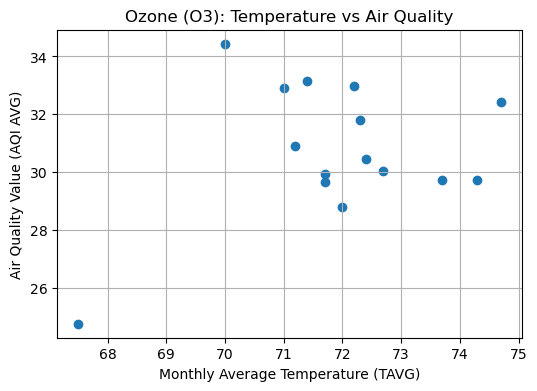

In [19]:
# creating multiple graphs for each of the three pollutants 
# similar graph structure to question 2
for pollutant in air_temp_merged["Name"].unique(): # this for loop is purely implemented so we don't need to have 3 different scripts for each indicator
    subset = air_temp_merged[air_temp_merged["Name"] == pollutant]

    plt.figure(figsize=(6,4))
    plt.scatter(subset["avg_temp"], subset["avg_air_val"])
    plt.title(f"{pollutant}: Temperature vs Air Quality") 
    plt.xlabel("Monthly Average Temperature (TAVG)") # independant variable
    plt.ylabel("Air Quality Value (AQI AVG)") # dependant variable 
    plt.grid(True)
    plt.show()

In [20]:
# # not part of the question submission, but found a method called corr() that computes the correlation between the variables
# # for fine particles (PM 2.5), there isn't much correlation between PM 2.5 and temperature values
# # However, for NO2, there seems to be a slight negative correlation, which is seen in the NO2 graph. 
# # On the other hand, when the air temperature rises, the Ozone levels are more apparent, with the outlier being below an AQI of 25
# # But, the corr() method indicated that there was little correlation between the Ozone & Temp
# temp_air_corr_esults = (
#     air_temp_merged
#     .groupby("Name")[["avg_air_val", "avg_temp"]]
#     .corr()
#     .iloc[0::2, -1]
#     .reset_index(level=1, drop=True)
#     .reset_index(name="temp_air_corr")
# )

# temp_air_corr_esults
# # Again, this section was purely curiosity and not connected with my final analysis. I personally wanted to display a cool finding

# ANSWERING QUESTION 3
- For Fine particles (PM2.5), the scatter plot shows no strong linear relationship between temperature and PM2.5 levels. PM 2.5 values appear fairly spread across both lower and higher temperatures, indicating that temperature alone does not strongly predict PM 2.5 indicator concentrations; rather, other factors (emission sources or atmospheric conditions) may play a larger role.
- For Nitrogen dioxide (NO₂), there seems to be a slight negative relationship between temperature and NO₂ levels. Higher NO2 concentrations tend to occur at lower temperatures, whereas warmer months exhibit noticeably lower NO2 values. This pattern is consistent with increased fuel combustion and reduced atmospheric mixing during colder periods, and enhanced dispersion and photolysis during warmer months (Cichowics, 2017). 
- For Ozone (O₃), it showed a positive relationship with temperature where higher ozone concentrations were more clustered at higher temperatures, which aligns with established atmospheric chemistry, as ozone formation is driven by sunlight and heat (Wang, 2025).

### Conclusion
Overall, the relationship between temperature and air quality is specific to the pollutant. NO₂ tends to decrease as temperature increases, ozone tends to increase with higher temperatures, and PM2.5 does not show a clear temperature-driven pattern. These results indicate that temperature influences air quality differently depending on the pollutant.

### QUESTION 4: Do extreme temperature months (hot or cold) show different air quality values compared to average temperature months?

In [21]:
# computing the mean of all temperatures as well as getting the standard deviation
temp_mean = monthly_temp["avg_temp"].mean()
temp_std  = monthly_temp["avg_temp"].std()

# getting the cold and hot thresholds for extreme temperatures
cold_threshold = temp_mean - temp_std
hot_threshold  = temp_mean + temp_std

temp_mean, temp_std, cold_threshold, hot_threshold

(np.float64(55.89457994579946),
 15.503352474045348,
 np.float64(40.39122747175411),
 np.float64(71.3979324198448))

In [22]:
# label each month by temperature category
# implemented a method to assign a treshold label to whatever the temp value is
# allows for future analysis and group bys
def temp_category(temp):
    if temp <= cold_threshold: # if temp is <= ~40.39
        return "Cold"
    elif temp >= hot_threshold:# if temp is >= ~71.39
        return "Hot"
    else:
        return "Average" # this way, we can see all three categories then attach these to air quality dataframe

monthly_temp["temp_category"] = monthly_temp["avg_temp"].apply(temp_category)

monthly_temp["temp_category"].value_counts()

temp_category
Average    202
Hot         86
Cold        81
Name: count, dtype: int64

In [23]:
# merge with temperature category into air-quality data
air_temp_cat = air_temp_merged.merge(
    monthly_temp[["year", "month", "temp_category"]],
    on=["year", "month"], # same columns per usual
    how="left"
)

air_temp_cat.head()

,year,month,Name,avg_air_val,avg_temp,temp_category
0,2008,12,Fine particles (PM 2.5),12.267518,38.1,Cold
1,2008,12,Nitrogen dioxide (NO2),28.287092,38.1,Cold
2,2009,6,Fine particles (PM 2.5),11.103191,67.5,Average
3,2009,6,Nitrogen dioxide (NO2),22.075248,67.5,Average
4,2009,6,Ozone (O3),24.762979,67.5,Average


In [24]:
# creating a dataframe that groups by names and the category of temperature
air_by_temp_cat = (
    air_temp_cat
    .groupby(["Name", "temp_category"])["avg_air_val"]
    .mean()
    .reset_index()
)

air_by_temp_cat

,Name,temp_category,avg_air_val
0,Fine particles (PM 2.5),Average,9.184114
1,Fine particles (PM 2.5),Cold,8.309314
2,Fine particles (PM 2.5),Hot,9.172804
3,Nitrogen dioxide (NO2),Average,20.119048
4,Nitrogen dioxide (NO2),Cold,21.889456
5,Nitrogen dioxide (NO2),Hot,15.491652
6,Ozone (O3),Average,30.759057
7,Ozone (O3),Hot,30.790705


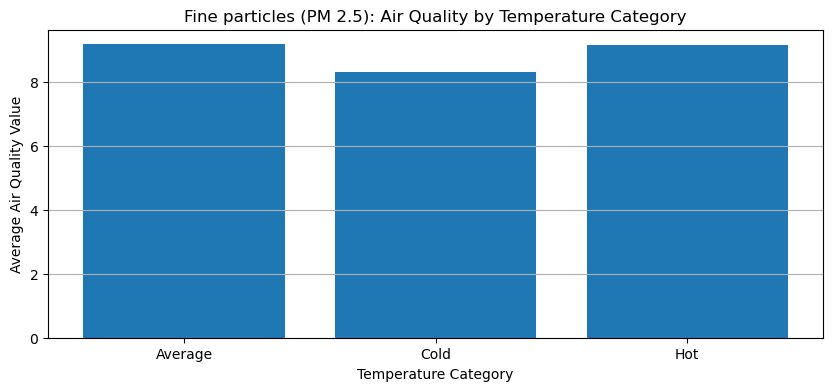

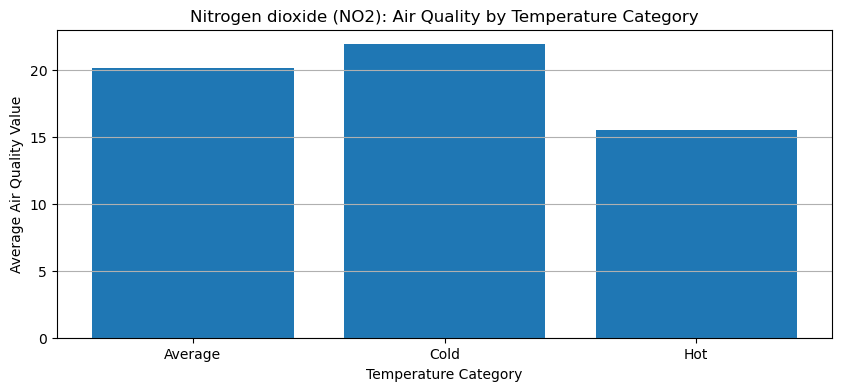

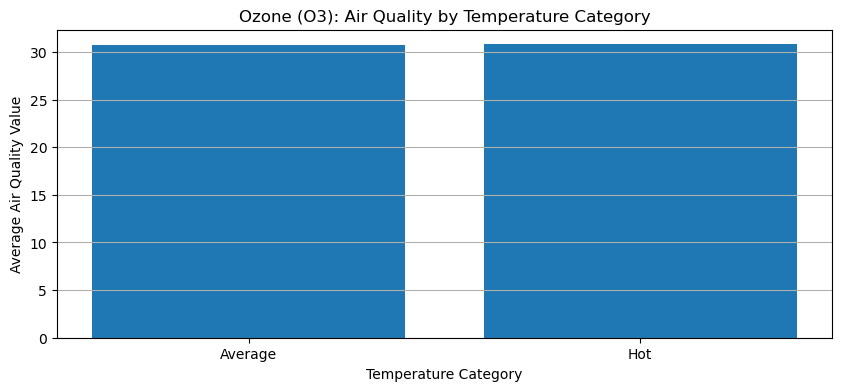

In [25]:
# graph purely for visuals
# personally found the bar graph to be the best to visualize the count
for pollutant in air_by_temp_cat["Name"].unique():
    subset = air_by_temp_cat[air_by_temp_cat["Name"] == pollutant]

    plt.figure(figsize=(10,4))
    plt.bar(subset["temp_category"], subset["avg_air_val"]) # would be best to represent the temp categories as independants (the ones we grouped by) alongside the air values to be dependant on which category is being displayed.
    plt.title(f"{pollutant}: Air Quality by Temperature Category")
    plt.xlabel("Temperature Category")
    plt.ylabel("Average Air Quality Value")
    plt.grid(axis="y")
    plt.show()

# ANSWERING QUESTION 4: 
The bar charts illustrate how average air quality values vary across cold, average, and hot months for each pollutant.
- Fine particles (PM2.5) values are slightly higher during average and hot months than during cold months. However, the differences are relatively small, showing that extreme temperature conditions alone do not strongly affect PM2.5 concentrations.
- Nitrogen dioxide (NO₂) concentrations peak during cold months and are at their lowest during hot months, suggesting a strong relationship between colder temperatures and increased NO₂ levels.
- Ozone (O₃) levels are higher during hot months compared to average months. However, as explained earlier, the limitations of this dataset were that it lacked values for cold-month ozone levels.

### Conclusion
These visualizations confirm that extreme temperature months are associated with distinct air quality patterns, particularly for NO₂ and O₃. Cold months correspond to higher NO₂ concentrations, while hot months correspond to higher ozone levels. In contrast, PM2.5 shows only minor variation across temperature categories, reinforcing the conclusion that temperature impacts air quality in a pollutant-specific manner.

# QUESTION 5: Do asthma emergency department visits associated with PM2.5 and ozone differ during cold, average, and hot temperature months?

In [26]:
air_df["Name"].unique()

array(['Ozone (O3)', 'Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)',
       'Annual vehicle miles traveled (cars)',
       'Annual vehicle miles traveled',
       'Annual vehicle miles traveled (trucks)', 'Deaths due to PM2.5',
       'Asthma emergency department visits due to PM2.5',
       'Asthma emergency departments visits due to Ozone',
       'Asthma hospitalizations due to Ozone',
       'Cardiac and respiratory deaths due to Ozone',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Outdoor Air Toxics - Benzene',
       'Outdoor Air Toxics - Formaldehyde'], dtype=object)

In [27]:
# there's two indicators that focuses on asthma, and since question 4 focused on average/cold/hot categories, 
# we can use the dataset there to determine if people's visits because of those indicators (during specific seasonal categories) change

In [28]:
asthma_indicators = [ # list to hold the indicators we will be using
    "Asthma emergency department visits due to PM2.5",
    "Asthma emergency departments visits due to Ozone",
]

asthma_df = air_df[air_df["Name"].isin(asthma_indicators)].copy()
# now we hold a data frame where asthma visits to the ED ONLY occurred due to PM 2.5 & Ozone 
asthma_df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,year,month,season
6670,827480,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",Borough,1,Bronx,2017-2019,2017-01-01,108.0,NaN,2017,1,Winter
6671,827479,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",Borough,2,Brooklyn,2017-2019,2017-01-01,54.0,NaN,2017,1,Winter
6674,827909,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,502,Stapleton - St. George,2017-2019,2017-01-01,45.0,NaN,2017,1,Winter
6678,827474,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,102,Northeast Bronx,2017-2019,2017-01-01,81.0,NaN,2017,1,Winter
6680,827459,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,210,Coney Island - Sheepshead Bay,2017-2019,2017-01-01,30.0,NaN,2017,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,130804,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,211,Williamsburg - Bushwick,2005-2007,2005-01-01,185.7,NaN,2005,1,Winter
18822,130801,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,208,Canarsie - Flatlands,2005-2007,2005-01-01,91.9,NaN,2005,1,Winter
18825,131035,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,202,Downtown - Heights - Slope,2005-2007,2005-01-01,77.1,NaN,2005,1,Winter
18845,131312,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",Borough,3,Manhattan,2005-2007,2005-01-01,43.8,NaN,2005,1,Winter


In [29]:
# aggregate asthma ED visits by year and month with all the data values
# very similar implementation to all previous questions
asthma_monthly = (
    asthma_df
    .groupby(["year", "month", "Name"])["Data Value"]
    .mean()
    .reset_index()
    .rename(columns={"Data Value": "avg_asthma_val"}) # easier readiability 
)

asthma_monthly.head(2)

,year,month,Name,avg_asthma_val
0,2005,1,Asthma emergency department visits due to PM2.5,90.432292
1,2005,1,Asthma emergency departments visits due to Ozone,67.702083


In [33]:
# merge temperature category into asthma data
asthma_temp_cat = asthma_monthly.merge(
    monthly_temp[["year", "month", "temp_category"]], 
    on=["year", "month"], # best columns to merge on 
    how="left" # doesn't matter which join to use this time; there's no null values doing LEFT JOIN
)

asthma_temp_cat.head(2)

,year,month,Name,avg_asthma_val,temp_category
0,2005,1,Asthma emergency department visits due to PM2.5,90.432292,Cold
1,2005,1,Asthma emergency departments visits due to Ozone,67.702083,Cold


In [31]:
asthma_by_temp_cat = (
    asthma_temp_cat
    .groupby(["Name", "temp_category"])["avg_asthma_val"]
    .mean()
    .reset_index()
)

# We can see only when the temperature was categorized as cold, this was when the visits most occurred
# another limitation explanation in this dataset
asthma_by_temp_cat

,Name,temp_category,avg_asthma_val
0,Asthma emergency department visits due to PM2.5,Cold,65.851061
1,Asthma emergency departments visits due to Ozone,Cold,71.866250


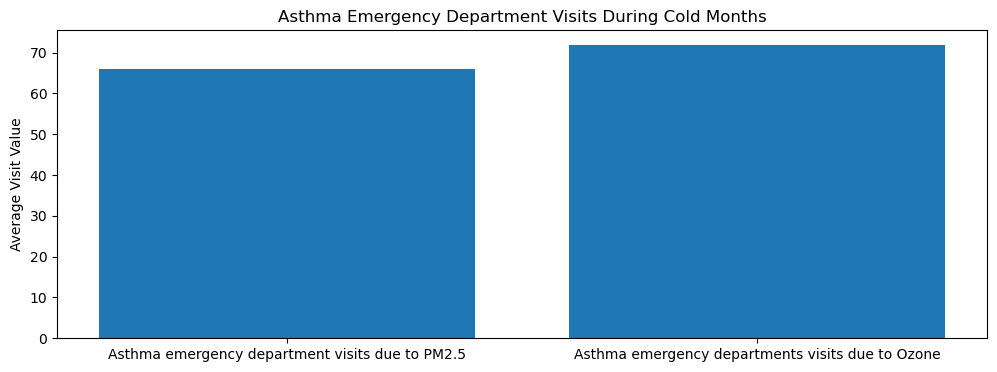

In [32]:
plt.figure(figsize=(12,4))
plt.bar(asthma_by_temp_cat["Name"], asthma_by_temp_cat["avg_asthma_val"]) # very simple bar graph to compare the two values
plt.title("Asthma Emergency Department Visits During Cold Months")
plt.ylabel("Average Visit Value")
plt.show()

# ANSWERING QUESTION 5

Based on the available data, asthma emergency department visits associated with PM2.5 and ozone are reported only during cold months. As a result, direct comparisons across cold, average, and hot temperature categories are not possible, showing the insufficient data within the dataset. Within cold months, asthma emergency department visits associated with ozone exhibit a higher average value compared to visits associated with PM2.5. This suggests that during colder periods, when nitrogen dioxide levels are elevated, air pollution may be associated with increased respiratory health impacts.

### Interpretation and limitations

Although this dataset does not allow for a direct comparison across temperature categories, the presence of asthma-related indicators exclusively during cold months aligns with findings from Question 4, which showed that colder temperatures are associated with higher concentrations of certain pollutants (particularly NO₂). This supports the broader conclusion that cold weather conditions may increase air-quality–related health outcomes.

# Overall Findings

## This project examined trends and patterns in New York City air quality over time. The results show that PM2.5 and NO₂ have generally declined, while ozone levels remain more variable and closely related to warmer temperatures. Seasonal and temperature-based analyses indicate higher NO₂ levels during colder periods and higher ozone concentrations during hotter months, with PM2.5 showing smaller variation. The analysis of asthma emergency department visits added a health perspective, suggesting that poorer air quality during colder periods may be associated with increased respiratory impacts.

# Limitations

## This analysis was limited by inconsistent reporting across the datasets, as air quality indicators were not available for all months and seasons. Additionally, asthma emergency department visit data were only reported during cold months, preventing direct comparisons across temperature categories. More complete temporal coverage would allow for stronger conclusions in future analyses.